## Maze generation algorithm
1. Depth first search
2. Recursive backtracker

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: This function is deprecated. Please call randint(0, 40 + 1) instead
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: This function is deprecated. Please call randint(0, 20 + 1) instead
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: This function is deprecated. Please call randint(0, 3 + 1) instead
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: This function is deprecated. Please call randint(0, 2 + 1) instead
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


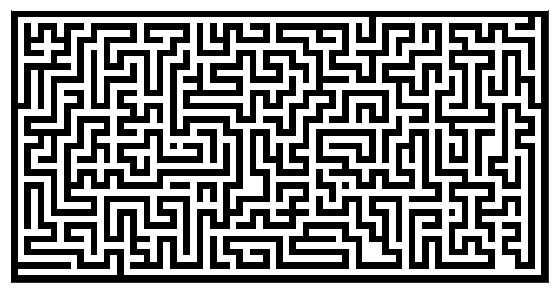

In [53]:
#This one creates loops
import numpy as np
from numpy.random import random_integers as rand
import matplotlib.pyplot as pyplot
%matplotlib inline

def maze(width=4, height=4, complexity=.75, density=.75):
    # Only odd shapes
    shape = ((height // 2) * 2 + 1, (width // 2) * 2 + 1)
    # Adjust complexity and density relative to maze size
    complexity = int(complexity * (5 * (shape[0] + shape[1])))
    density    = int(density * ((shape[0] // 2) * (shape[1] // 2)))
    # Build actual maze
    Z = numpy.zeros(shape, dtype=bool)
    # Fill borders
    Z[0, :] = Z[-1, :] = 1
    Z[:, 0] = Z[:, -1] = 1
    # Make aisles
    for i in range(density):
        x, y = rand(0, shape[1] // 2) * 2, rand(0, shape[0] // 2) * 2
        Z[y, x] = 1
        for j in range(complexity):
            neighbours = []
            if x > 1:             neighbours.append((y, x - 2))
            if x < shape[1] - 2:  neighbours.append((y, x + 2))
            if y > 1:             neighbours.append((y - 2, x))
            if y < shape[0] - 2:  neighbours.append((y + 2, x))
            if len(neighbours):
                y_,x_ = neighbours[rand(0, len(neighbours) - 1)]
                if Z[y_, x_] == 0:
                    Z[y_, x_] = 1
                    Z[y_ + (y - y_) // 2, x_ + (x - x_) // 2] = 1
                    x, y = x_, y_
    return Z

pyplot.figure(figsize=(10, 5))
pyplot.imshow(maze(80, 40), cmap=pyplot.cm.binary, interpolation='nearest')
pyplot.xticks([]), pyplot.yticks([])
pyplot.show()

In [103]:
#Create one step of a QRW
import pyquil
from pyquil.quil import Program
from pyquil.api import QVMConnection
from pyquil.gates import *

def createToffoli():
    identity = np.identity(8)
    identity[[6],[6]] = 0
    identity[[6],[7]] = 1
    identity[[7],[7]] = 0
    identity[[7],[6]] = 1
    return identity

print(createToffoli())

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]


In [104]:
#Creating a Toffoli and checking
qvm = QVMConnection()
Toffoli =  createToffoli()
prog = Program()
prog.defgate('Toffoli', Toffoli)

prog.inst(X(0),X(1))
prog.inst(('Toffoli', 0,1,2)).measure(2,2).measure(0,0).measure(1,1)
print(prog)
classical_regs  = [0,1,2]
qvm.run(prog, classical_regs)

DEFGATE Toffoli:
    1.0, 0, 0, 0, 0, 0, 0, 0
    0, 1.0, 0, 0, 0, 0, 0, 0
    0, 0, 1.0, 0, 0, 0, 0, 0
    0, 0, 0, 1.0, 0, 0, 0, 0
    0, 0, 0, 0, 1.0, 0, 0, 0
    0, 0, 0, 0, 0, 1.0, 0, 0
    0, 0, 0, 0, 0, 0, 0, 1.0
    0, 0, 0, 0, 0, 0, 1.0, 0

X 0
X 1
Toffoli 0 1 2
MEASURE 2 [2]
MEASURE 0 [0]
MEASURE 1 [1]



[[1, 1, 1]]

In [105]:
def inverseToffoli():
    identity = np.identity(8)
    identity[[0],[0]] = 0
    identity[[0],[1]] = 1
    identity[[1],[1]] = 0
    identity[[1],[0]] = 1
    return identity
invToffoli = inverseToffoli()

prog = Program()
prog.defgate('invToffoli', invToffoli)
prog.inst(('invToffoli', 0,1,2)).measure(0,0).measure(1,1).measure(2,2)
print(prog)
qvm.run(prog, classical_regs)

DEFGATE invToffoli:
    0, 1.0, 0, 0, 0, 0, 0, 0
    1.0, 0, 0, 0, 0, 0, 0, 0
    0, 0, 1.0, 0, 0, 0, 0, 0
    0, 0, 0, 1.0, 0, 0, 0, 0
    0, 0, 0, 0, 1.0, 0, 0, 0
    0, 0, 0, 0, 0, 1.0, 0, 0
    0, 0, 0, 0, 0, 0, 1.0, 0
    0, 0, 0, 0, 0, 0, 0, 1.0

invToffoli 0 1 2
MEASURE 0 [0]
MEASURE 1 [1]
MEASURE 2 [2]



[[0, 0, 1]]

In [107]:
def controlSWAP():
    identity = np.identity(8)
    identity[[5],[5]] = 0
    identity[[5],[6]] = 1
    identity[[6],[6]] = 0
    identity[[6],[5]] = 1
    return identity

prog = Program()
controlSWAP = controlSWAP()
prog.defgate('controlSWAP', controlSWAP)
prog.inst(X(0), X(1), ('controlSWAP',0,1,2)).measure(0,0).measure(1,1).measure(2,2)
print(prog)
qvm.run(prog, classical_regs)

DEFGATE controlSWAP:
    1.0, 0, 0, 0, 0, 0, 0, 0
    0, 1.0, 0, 0, 0, 0, 0, 0
    0, 0, 1.0, 0, 0, 0, 0, 0
    0, 0, 0, 1.0, 0, 0, 0, 0
    0, 0, 0, 0, 1.0, 0, 0, 0
    0, 0, 0, 0, 0, 0, 1.0, 0
    0, 0, 0, 0, 0, 1.0, 0, 0
    0, 0, 0, 0, 0, 0, 0, 1.0

X 0
X 1
controlSWAP 0 1 2
MEASURE 0 [0]
MEASURE 1 [1]
MEASURE 2 [2]



[[1, 0, 1]]

In [108]:
def controlHadamard():
    identity = np.identity(4)
    identity[[2],[2]] = 1/np.sqrt(2)
    identity[[2],[3]] = 1/np.sqrt(2)
    identity[[3],[2]] = 1/np.sqrt(2)
    identity[[3],[3]] = -1/np.sqrt(2)
    return identity

controlH = controlHadamard()
prog = Program()
prog.defgate('controlH', controlH)
prog.inst(X(0), ('controlH', 0,1)).measure(0,0).measure(1,1)
reg = [0,1]
qvm.run(prog, reg, trials = 10)


[[1, 0],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 0],
 [1, 1],
 [1, 0],
 [1, 1],
 [1, 0],
 [1, 0]]

In [124]:
def quantumRandomWalk(program):
    program.inst(('Toffoli', 0,3,5))
    
    program.inst(('invToffoli', 0,3,5))
    
    
    program.inst(('Toffoli', 1,4,6))
    
    program.inst(('invToffoli', 1,4,6))
    
    
    program.inst(('Toffoli', 5,6,7))
    
    
    program.inst(('Toffoli', 2,7,8))
    
    
    program.inst(('controlSWAP', 8,4,3))
    
    program.inst(('Toffoli', 2,7,8))
    
    program.inst(('Toffoli', 5,6,7))
    
    program.inst(('invToffoli', 1,4,6))
    
    program.inst(('Toffoli', 1,4,6))
    
    program.inst(('invToffoli', 0,3,5))
    
    program.inst(('Toffoli', 0,3,5))
    
    program.inst(('controlH', 3,4))
    
    return(program)

In [129]:
controlH = controlHadamard()
prog.defgate('controlH', controlH)

controlSWAP = controlSWAP()
#identity = np.identity(8)
#identity[[5],[5]] = 0
#identity[[5],[6]] = 1
#identity[[6],[6]] = 0
#identity[[6],[5]] = 1


#controlSWAP = identity 
prog.defgate('controlSWAP', controlSWAP)

invToffoli = inverseToffoli()
prog.defgate('invToffoli', invToffoli)

Toffoli =  createToffoli()
prog.defgate('Toffoli', Toffoli)

C:\Anaconda\lib\site-packages\pyquil\quil.py:128: UserWarning: Gate controlH has already been defined in this program
  warnings.warn("Gate {} has already been defined in this program".format(instruction.name))


TypeError: 'numpy.ndarray' object is not callable

In [112]:
prog = Program()

init_gate = np.identity(2**3)
for i in [2,3,4,5]:
    init_gate[i,i] = 0.
init_gate[2,3] = 1.
init_gate[3,2] = 1.
init_gate[4,5] = 1.
init_gate[5,4] = 1.


prog.defgate("INIT", init_gate)
prog += H(0)
prog += H(1) 
prog.inst(("INIT",0,1,2))

qvm = QVMConnection()
print(qvm.wavefunction(prog))
#results = qvm.run(prog,[0,1,2],1)
#print(results)

(0.5+0j)|000> + (0.5+0j)|011> + (0.5+0j)|101> + (0.5+0j)|110>


In [128]:
prog  = quantumRandomWalk(prog)
#prog = Program()
prog.measure(4,4)

qubits  = [x for x in range(9)]
qvm.run(prog, [4], trials = 10)

[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]